In [24]:
import os
import warnings

import pandas as pd

from jre_utils.datapath import DATA_DIRECTORY_PATH

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [32]:
revenue_breakdown_directory_path = (
    f"{DATA_DIRECTORY_PATH}/exploratory/LFS_revenue_breakdown"
)
datasets = [
    "2020.csv",
    "2021.csv",
    "2011_2018.csv",
    "2022.csv",
    "1995_2003.csv",
    "2019.csv",
    "2003_2011.csv",
    "1989_1995.csv",
]

In [33]:
datasets

['2020.csv',
 '2021.csv',
 '2011_2018.csv',
 '2022.csv',
 '1995_2003.csv',
 '2019.csv',
 '2003_2011.csv',
 '1989_1995.csv']

In [41]:
dataframes = {}
for dataset in datasets:
    dataframes[dataset.split(".")[0]] = pd.read_csv(f"{revenue_breakdown_directory_path}/{dataset}", encoding="utf-8")

In [46]:
dataframes.keys()

dict_keys(['2020', '2021', '2011_2018', '2022', '1995_2003', '2019', '2003_2011', '1989_1995'])

In [45]:
# for year in ["2019", "2020", "2021", "2022"]:
#     df = dataframes[year]
#     df = df[df["area_code"].astype(str).apply(lambda x: x.isdigit())]
#     df["area_code"] = df["area_code"].astype(int)
#     df["area_code"] = df["area_code"] // 10
#     dataframes[year] = df

for year in dataframes.keys():
    df = dataframes[year]
    df["year"] = df["year"].astype(int)
    dataframes[year] = df

In [47]:
# combined_df= pd.concat([
#     dataframes["2022"],
#     dataframes["2021"],
#     dataframes["2020"],
#     dataframes["2019"],
#     dataframes["2011_2018"],
#     dataframes["2003_2011"],
#     dataframes["1995_2003"],
#     dataframes["1989_1995"],
# ])
combined_df = pd.concat(dataframes.values())


In [48]:
combined_df.sort_values(by=["year", "area_code"], ascending=[False, True], ignore_index=True)

,year,area_code,県名,団体名,001:地方税,002:地方譲与税,003:地方揮発油譲与税,007:自動車重量譲与税,009:利子割交付金,010:配当割交付金,011:株式等譲渡所得割交付金,014:地方消費税交付金,015:ゴルフ場利用税交付金,017:自動車取得税交付金,020:法人事業税交付金,030:授業料,035:公営住宅使用料,040:国庫支出金,046:普通建設事業費支出金,団体名(市町村分),21.財産収入,22.寄附金,24.繰越金
0,2022,1100,NaN,札幌市,347606361,5418084,1887987,3208558,100249,730142,588161,52918097,94048,0,4518888,683544,6446755,348870199,16117125,NaN,NaN,NaN,NaN
1,2022,1100,NaN,札幌市,72714080,57369994,11299976,0,0,708097,20411,12283141,12285807,0,15344086,151610,0,0,632198,NaN,NaN,NaN,NaN
2,2022,1202,NaN,函館市,32031925,789538,171434,513126,11322,82681,66714,6838038,8288,0,483577,88973,979357,40896004,902354,NaN,NaN,NaN,NaN
3,2022,1202,NaN,函館市,9307468,5937168,935776,0,0,135151,4517,444163,1661494,199574,2976428,10460,16516,0,212841,NaN,NaN,NaN,NaN
4,2022,1203,NaN,小樽市,13845729,324636,72707,217625,4238,30930,24944,3051797,36366,0,223446,0,516328,16788216,673229,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133005,1989,47373,NaN,NaN,118051,36610,***,18572,2032,***,***,***,0,13208,NaN,1978,18650,395882,319762,上野村,18985,0,92722
133006,1989,47374,NaN,NaN,249859,133845,***,26687,3682,***,***,***,0,18963,NaN,4544,26008,456764,265440,伊良部町,15784,7200,41751
133007,1989,47375,NaN,NaN,47701,13566,***,6828,885,***,***,***,0,4847,NaN,2391,2105,142618,100436,多良間村,52,0,41998
133008,1989,47381,NaN,NaN,210682,36095,***,16636,3928,***,***,***,0,11854,NaN,1939,11048,635498,539590,竹富町,29826,2879,75044


In [8]:
combined_df.to_csv(f"{DATA_DIRECTORY_PATH}/exploratory/LFS_revenue_breakdown/combined.csv", index=False)

In [9]:
taxable_income_with_area_code_path = (
    f"{DATA_DIRECTORY_PATH}/exploratory/taxable_income_with_area_code.csv"
)
taxable_income_with_area_code_df = pd.read_csv(taxable_income_with_area_code_path)
taxable_income_with_area_code_df

,year,area_code,area,taxable_income
0,2021,1100,Hokkaido Sapporo-shi,2971365734
1,2021,1101,Hokkaido Sapporo-shi Chuo-ku,-
2,2021,1102,Hokkaido Sapporo-shi Kita-ku,-
3,2021,1103,Hokkaido Sapporo-shi Higashi-ku,-
4,2021,1104,Hokkaido Sapporo-shi Shiroishi-ku,-
...,...,...,...,...
70847,1985,47361,Okinawa-ken Kumejima-cho,3992455
70848,1985,47362,Okinawa-ken Yaese-cho,9023653
70849,1985,47375,Okinawa-ken Tarama-son,439590
70850,1985,47381,Okinawa-ken Taketomi-cho,1525627


In [10]:
merged_df = taxable_income_with_area_code_df.merge(combined_df, on=["year", "area_code"])
merged_df

,year,area_code,area,taxable_income,県名,団体名,001:地方税,002:地方譲与税,003:地方揮発油譲与税,007:自動車重量譲与税,009:利子割交付金,010:配当割交付金,011:株式等譲渡所得割交付金,014:地方消費税交付金,015:ゴルフ場利用税交付金,017:自動車取得税交付金,020:法人事業税交付金,030:授業料,035:公営住宅使用料,040:国庫支出金,046:普通建設事業費支出金,団体名(市町村分),21.財産収入,22.寄附金,24.繰越金
0,2021,1100,Hokkaido Sapporo-shi,2971365734,北海道,札幌市,334595895,5463147,1987812,3218437,161174,821798,999198,49942134,94871,0,4716562,705973,6632731,420192265,20780650,NaN,NaN,NaN,NaN
1,2021,1100,Hokkaido Sapporo-shi,2971365734,北海道,札幌市,63518276,48826227,11283111,0,0,230144,20360,5569078,12822143,0,14692049,151667,0,0,518375,NaN,NaN,NaN,NaN
2,2021,1100,Hokkaido Sapporo-shi,2971365734,北海道,札幌市,334595895,5463147,1987812,3218437,161174,821798,999198,49942134,94871,0,4716562.0,705973,6632731,420192265,20780650,NaN,NaN,NaN,NaN
3,2021,1100,Hokkaido Sapporo-shi,2971365734,北海道,札幌市,63518276,48826227,11283111,0,0,230144,20360,5569078,12822143,0,14692049.0,151667,0,0,518375,NaN,NaN,NaN,NaN
4,2021,1202,Hokkaido Hakodate-shi,319440182,北海道,函館市,31267532,789329,179704,513802,18082,92378,112427,6710399,9233,0,403348,93976,999094,40769199,583487,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125347,1989,47375,Okinawa-ken Tarama-son,501040,NaN,NaN,47701,13566,***,6828,885,***,***,***,0,4847,NaN,2391,2105,142618,100436,多良間村,52,0,41998
125348,1989,47381,Okinawa-ken Taketomi-cho,1810137,NaN,NaN,210682,36095,***,16636,3928,***,***,***,0,11854,NaN,1939,11048,635498,539590,竹富町,29826,2879,75044
125349,1989,47381,Okinawa-ken Taketomi-cho,1810137,NaN,NaN,210682,36095,***,16636,3928,***,***,***,0,11854,NaN,1939,11048,635498,539590,竹富町,29826,2879,75044
125350,1989,47382,Okinawa-ken Yonaguni-cho,954126,NaN,NaN,90638,34076,***,17890,1862,***,***,***,0,12784,NaN,2698,16676,251218,202632,与那国町,40400,1180,17354


<Axes: xlabel='taxable_income', ylabel='001:地方税'>

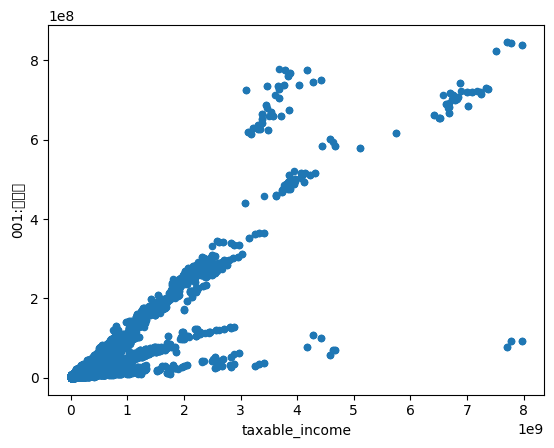

In [23]:
merged_df.sample(n=100000).plot(x="taxable_income", y="001:地方税", kind="scatter")

In [14]:
merged_df = merged_df[merged_df["taxable_income"].apply(lambda x: x.isdigit())]
merged_df["taxable_income"] = merged_df["taxable_income"].astype(float)

merged_df = merged_df[merged_df["001:地方税"].apply(lambda x: x.isdigit())]
merged_df["001:地方税"] = merged_df["001:地方税"].astype(float)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115308 entries, 0 to 125351
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             115308 non-null  int64  
 1   area_code        115308 non-null  int64  
 2   area             115308 non-null  object 
 3   taxable_income   115308 non-null  float64
 4   県名               20892 non-null   object 
 5   団体名              20892 non-null   object 
 6   001:地方税          115308 non-null  float64
 7   002:地方譲与税        115308 non-null  object 
 8   003:地方揮発油譲与税     115308 non-null  object 
 9   007:自動車重量譲与税     115308 non-null  object 
 10  009:利子割交付金       115308 non-null  object 
 11  010:配当割交付金       115308 non-null  object 
 12  011:株式等譲渡所得割交付金  115308 non-null  object 
 13  014:地方消費税交付金     115308 non-null  object 
 14  015:ゴルフ場利用税交付金   115308 non-null  object 
 15  017:自動車取得税交付金    115308 non-null  object 
 16  020:法人事業税交付金     13928 non-null   object 
 